In [61]:
import pandas as pd

from sklearn import linear_model

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.decomposition import PCA

import numpy as np

import pylab as plt

In [3]:
dados = pd.read_csv("c:/Users/Felipe/Documents/GitHub/pythonstat/ex_classificador/SAheart.data.csv", sep=",")

In [7]:
dados.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,True,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,False,55,28.87,2.06,63,1


In [6]:
dados.famhist = dados.famhist == 'Present'  ;

In [105]:
tamanhoTeste = 0.3

X = dados.drop(columns='chd');
y = dados.loc[:, ['chd']] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=tamanhoTeste)

In [169]:
kernelSGD = linear_model.SGDClassifier()
kernelLog = linear_model.LogisticRegressionCV()

In [171]:
def scores(y_pred_,y_test):
    return (metrics.precision_score(y_pred_, y_test),
metrics.recall_score(y_pred_, y_test),
metrics.f1_score(y_pred_, y_test))

In [197]:

kernelSGD.fit(X_train,y_train);
kernelLog.fit(X_train,y_train);

y_pred_ = kernelLog.predict(X_test)

y_pred_log_prf = scores(y_pred_,y_test)

y_pred_t = kernelSGD.predict(X_test)

y_pred_sgd_prf = scores(y_pred_,y_test)

In [32]:
from sklearn.decomposition import PCA

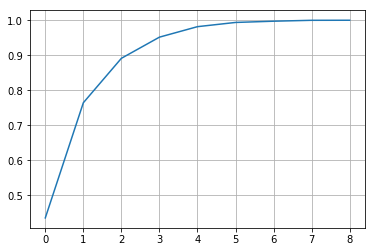

In [176]:
def  ex_var(comp):
    pca = PCA(n_components=comp)
    
    pca.fit(X_train)

    return np.cumsum(pca.explained_variance_ratio_)

eerv = map(ex_var, range(2,10))

plt.plot(eerv[-1]); plt.grid()

In [177]:
pca = PCA(n_components=5)
pca.fit(X_train)

x_train_t = pca.transform(X_train)
x_test_t = pca.transform(X_test)

In [183]:
kernelSGD.fit(x_train_t,y_train);
kernelLog.fit(x_train_t,y_train);

y_pred_t = kernelSGD.predict(x_test_t)

y_pred_sgd_prf_pca = scores(y_pred_t,y_test)

y_pred_t = kernelLog.predict(x_test_t)

y_pred_log_prf_pca = scores(y_pred_t,y_test)

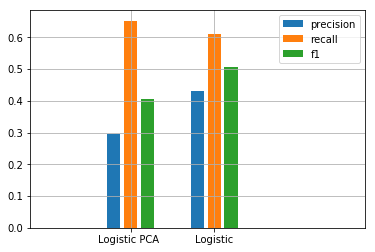

In [204]:
x1=np.arange(1,3)*5
p='precision'
plt.bar(height=[y_pred_log_prf_pca[0], y_pred_log_prf[0] ], x=x1, label=p)

p='recall'
plt.bar(height=[y_pred_log_prf_pca[1], y_pred_log_prf[1] ], x=x1+1, label= p)
 
p='f1'
plt.bar(height=[y_pred_log_prf_pca[2], y_pred_log_prf[2] ], x=x1+2, label= p)

plt.xticks(x1+1, ('Logistic PCA ', 'Logistic')); plt.grid(); plt.legend()

plt.axis([0,20,0,None]);

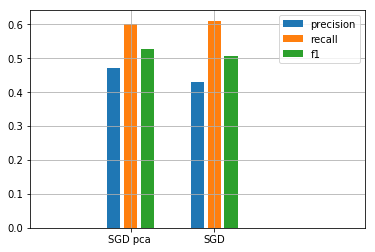

In [203]:
x1=np.arange(1,3)*5
p='precision'
plt.bar(height=[y_pred_sgd_prf_pca[0], y_pred_sgd_prf[0] ], x=x1, label=p)

p='recall'
plt.bar(height=[y_pred_sgd_prf_pca[1], y_pred_sgd_prf[1] ], x=x1+1, label= p)
 
p='f1'
plt.bar(height=[y_pred_sgd_prf_pca[2], y_pred_sgd_prf[2] ], x=x1+2, label= p)

plt.xticks(x1+1, ('SGD pca ', 'SGD')); plt.grid(); plt.legend()

plt.axis([0,20,0,None]);

In [184]:
y_pred_sgd_prf_pca

(0.47058823529411764, 0.6, 0.5274725274725275)

In [186]:
y_pred_log_prf_pca

(0.29411764705882354, 0.6521739130434783, 0.4054054054054054)